## DECISION TREE ALGORITHM


#### INTRODUCTION

NAME: TIMILEYIN SAMUEL AKINTILO

STUDENT ID: C00302909

This notebook showcases the implemention of the Decision Tree algorithm using the scikit-learn library. The notebook  used was obtained  from github (https://github.com/the-mrinal/ML-Notebook/blob/master/11.%20DesicionTree%20Implementation/Decision%20Tree.ipynb), and various alterations were implemented to demostrate a significant practical and theoretical understanding of the underlying machine learning algorithm. 

#### LOG OF CHANGES

This log embodies all the changes and alterations that were made on the original notebook, and the impact of those changes on the result of the analysis. The log is structured to follows the Cross Industry Standard Process for Data Mining (CRISP-DM) model, and the changes were logged under each of the six phases as follows:

**1. Business understanding**

The original machine learning analysis was on Iris dataset, which aimed at classifying the species of iris flowers. However, this analysis focuses on developing a machine learning classification algorithm that can determine whether an individual has urinary diesease or not based on certain features. 

**2. Data Understanding**

The original analysis was done on the Iris dataset which is one of Scikit-learn's built-in datasets. The dataset has four features (sepal length, sepal width, petal length, and petal width) and three classes of iris flowers (setosa, versicolor, and virginica). However, Decision Tree algorithm works better for binary classification, hence the need to utilize an alternative dataset

This new analysis makes use of the Urine analysis dataset which was gotten fron kaggle (https://www.kaggle.com/datasets/avarice02/urinalysis-test-results). The dataset contains 13 features, one of which is 'Diagnosis' which is the target variable. The dataset was collected from a local clinic in Philippines, and contains patient's health record. This dataset is suitable because it a binary classification task, which aligns with the strength of Decision Tree algorithm.

**3. Data Preparation**

In the data preprocessing stage, various attempt to feed in categorical data into the model was futile. Hence, the categorical features were enconded using a label encoder, making it suitable to be feed into the algorithm.
https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree
https://medium.com/@dyahayusekarkinasih/categorical-feature-in-decision-tree-classifier-3ad0c42c6dcc#:~:text=Yes%2C%20decision%20trees%20are%20capable,model%20understands%20nothing%20but%20numbers.

**4. Modelling**

The following changes were implemented during the modelling phase:

**a) Target variable oversampling using Synthetic Minority Oversampling Technique (SMOTE)**

**Change:** The target variabel (Diagnosis) was highlt inbalanced resulting making the model to overfit, so the SMOTE technique was employed to deal with the issue.

**Result:** The issue of Overfitting was resolved, bringing down the accuracy from 91% to 89%.

**b) Node spliting using Information gain**

**Change:** The critertion for spliting the nodes was changed from Gini impurity to entropy.

**Result:** This improved the accuracy of the model from 91% to 93%. The precision, accuracy and F1-Score of the model was also improved for the negative(0) and positive (1) class as well.

**c) Specifying the trees' maximum depth**

**Change:** Various maximum depth values were specified and the accuracy of the model was examined.

**Result:** The maximum depth value of 3 gave the best result. When max_depth 3, 4 and 5 , the accuracy of the model was 0.888, 0.875 and 0.885 respectively. The precision, recall and f1-score were also better when max_depth was 3. This is a clear indication that the model is overfitting when the max_depth is increased beyond 3.  


**4. Evaluation:**

The performance of the model was evaluated using various metric scores including accuracy, precision, recall and f1-score.


**5. Deployment:**

The best model was saved as a pickle file and was deployed as a web application which which runs locally. The name of the web app is Urinary_app.


#### ORIGINAL IRIS ANALYSIS

In [1]:
import pickle
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import  metrics


In [2]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state   = 1)

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)



In [3]:
confusion_matrix(y_test, y_test_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

#### THE URINARY TEST ANALYSIS

First things first, let's import the neccessary libraries.


#### 

In [4]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score


Next, we will load the data set and take a look at it.

In [44]:
# load the urina analysis dataset
df = pd.read_csv('urinalysis.csv')

In [45]:
# check the first few rows of the dataframe
df.head()


,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE
1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,RARE,FEW,FEW,MODERATE,NEGATIVE
2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,RARE,FEW,MODERATE,RARE,NEGATIVE
3,77.0,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,RARE,RARE,NONE SEEN,FEW,NEGATIVE
4,29.0,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,RARE,RARE,NONE SEEN,FEW,NEGATIVE


In [7]:
# Examine the shape of the dataset
df.shape

(1436, 13)

Now, we will check the distribution of the target variable

In [8]:
df.Diagnosis.value_counts()

Diagnosis
NEGATIVE    1355
POSITIVE      81
Name: count, dtype: int64

The distribution shows that the dataset is imbalanced. The number of patients with urinary disease is much less than the number of patients without the disease. 

In [9]:
# Examine the columns in the dataframe
df.columns

Index(['Age', 'Gender', 'Color', 'Transparency', 'Glucose', 'Protein', 'pH',
       'Specific Gravity', 'Epithelial Cells', 'Mucous Threads',
       'Amorphous Urates', 'Bacteria', 'Diagnosis'],
      dtype='object')

Since, most of the columns are categorical, we need to convert them to numerical values. We can use the a label encoder to convert the categorical values to numerical values. 

In [10]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])
categorical_columns.head()

,Gender,Color,Transparency,Glucose,Protein,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE
1,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,RARE,FEW,FEW,MODERATE,NEGATIVE
2,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,RARE,FEW,MODERATE,RARE,NEGATIVE
3,MALE,BROWN,CLOUDY,NEGATIVE,1+,RARE,RARE,NONE SEEN,FEW,NEGATIVE
4,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,RARE,RARE,NONE SEEN,FEW,NEGATIVE


In [11]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame and apply label encoding
for column in categorical_columns.columns:
    df[column] = label_encoder.fit_transform(df[column])

In [12]:
df.head()

,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,76.0,0,4,0,4,3,5.0,1.010,4,5,2,3,0
1,9.0,1,2,3,4,0,5.0,1.030,6,0,0,2,0
2,12.0,1,4,3,4,4,5.0,1.030,6,0,1,5,0
3,77.0,1,1,1,4,0,6.0,1.020,6,5,2,0,0
4,29.0,0,9,2,4,4,6.0,1.025,6,5,2,0,0


Great! Now that we have encoded the categorical columns, we can proceed to train a decision tree classifier using the encoded data.

Now, we can split the dataset into a training set and a test set. We will use 80% of the data for training and 20% for testing.

In [13]:
# Split the data into features and target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']


In [14]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Create a DecisionTreeClassifier instance
clf = DecisionTreeClassifier(random_state=42)

In [16]:
# Fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [18]:
# Check the accuracy of the model
accuracy = clf.score(X_test, y_test)
print(f"The accuracy of the model is {accuracy:.3f}")

The accuracy of the model is 0.913


In [19]:
# calculate the accuracy using confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[259,   9],
       [ 16,   4]], dtype=int64)

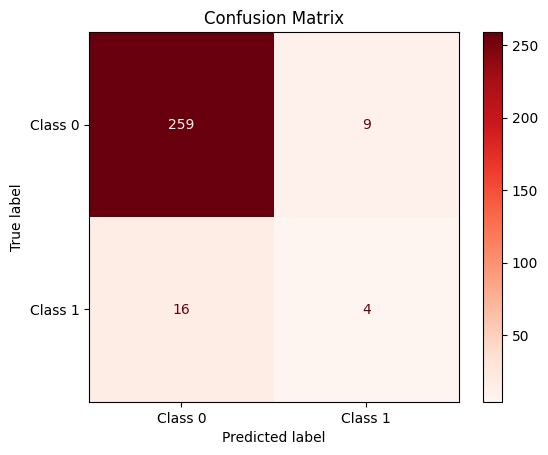

In [20]:
# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Reds', values_format='d', xticks_rotation='horizontal')  
plt.title('Confusion Matrix')
plt.show()

In [21]:
# display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       268
           1       0.31      0.20      0.24        20

    accuracy                           0.91       288
   macro avg       0.62      0.58      0.60       288
weighted avg       0.90      0.91      0.90       288



The model has an accuracy of 91%. However, there is possibibility of overfitting, because the imbalance in the target varaible.

#### Balancing the target variable

Let is examine the distribution of the target variable visually using a bar chart.


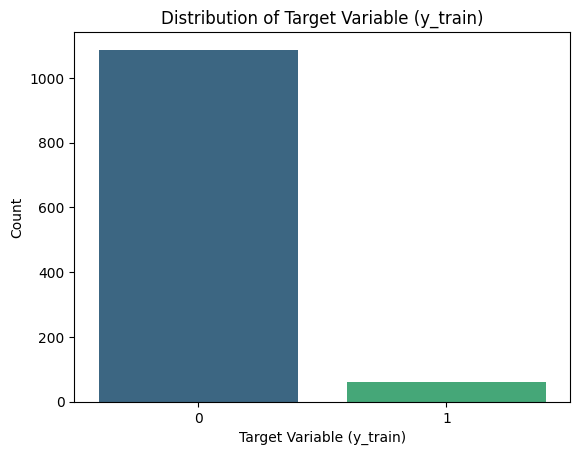

In [23]:
# Visualize the distribution of the target variable using a bar plot using matplotlib and seaborn

df = pd.DataFrame({'Target': y_train})

# Plotting the bar plot using Seaborn
sns.countplot(x='Target', data=df, hue='Target', palette='viridis', legend=False)
plt.xlabel('Target Variable (y_train)')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (y_train)')
plt.show()


The target variable is unbalanced, so we need to balance it using the SMOTE technique.

In [24]:
# We will balance the dataset by using the SMOTE technique
smote = SMOTE(random_state=42)

In [25]:
# Fit the SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [26]:
# check the shape of the resampled and former data
X_train_smote.shape, y_train_smote.shape, X_train.shape, y_train.shape

((2174, 12), (2174,), (1148, 12), (1148,))

In [27]:
# Create a DecisionTreeClassifier instance
clf1 = DecisionTreeClassifier(random_state=42)

In [28]:
# Now we can train the model using the resampled data
clf1.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

In [29]:
# Make predictions on the test data
y_pred = clf1.predict(X_test)

In [30]:
# Check the accuracy of the model
accuracy = clf1.score(X_test, y_test)
accuracy

0.8923611111111112

In [31]:
# calculate the accuracy using confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[253,  15],
       [ 16,   4]], dtype=int64)

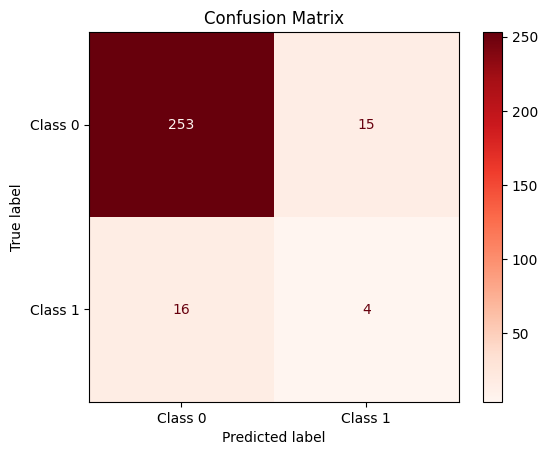

In [32]:
# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Reds', values_format='d', xticks_rotation='horizontal')  
plt.title('Confusion Matrix')
plt.show()

In [33]:
# display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       268
           1       0.21      0.20      0.21        20

    accuracy                           0.89       288
   macro avg       0.58      0.57      0.57       288
weighted avg       0.89      0.89      0.89       288



This looks like a much better result. The precision of the model remains 0,94 but there is a reduction in accuracy, reecall and F1-score after balancing the dataset using the SMOTE technique.

#### Using Information Gain to Split Nodes

Now, instead of spliting the nodes based on the Gini impurity, we can use the entropy impurity measure. We can do this by setting the criterion parameter to 'entropy' when creating the DecisionTreeClassifier instance.

In [34]:
# Create a DecisionTreeClassifier instance
clf2 = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [35]:
# Now we can train the model using the resampled data
clf2.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [36]:
# Make predictions on the test data
y_pred = clf2.predict(X_test)

In [37]:
# Check the accuracy of the model
accuracy = clf2.score(X_test, y_test)
accuracy

0.9270833333333334

In [38]:
# calculate the accuracy using confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[261,   7],
       [ 14,   6]], dtype=int64)

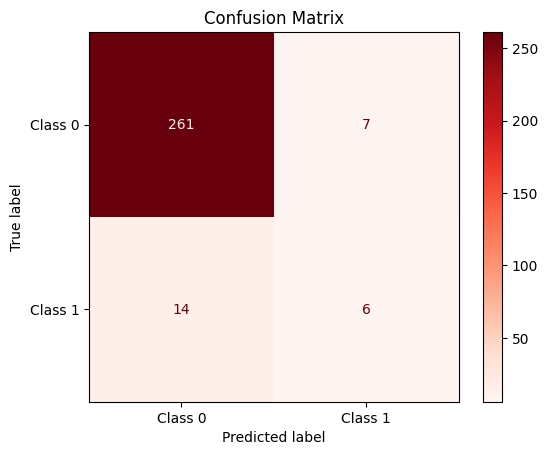

In [39]:
# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Reds', values_format='d', xticks_rotation='horizontal')  
plt.title('Confusion Matrix')
plt.show()


In [40]:
# display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       268
           1       0.46      0.30      0.36        20

    accuracy                           0.93       288
   macro avg       0.71      0.64      0.66       288
weighted avg       0.92      0.93      0.92       288



This looks like a much better result. The accuracy of the model has improved to 0.93, the precision, recall, and f1-score for the positive class (class 1) have also improved. The precision, recall, and f1-score for the negative class (class 0) have also improved. This is a good result.

#### Specify the maximum depth of the tree

We will create a function that will take different maximum depth values and return the accuracy of the model for each value. This will help us to determine the best maximum depth value for the model.

In [41]:
def decision_tree(max_depth_value):
    
    # Create a Decision Tree Classifier with the specified max_depth value
    clf3 = DecisionTreeClassifier(max_depth=max_depth_value, criterion='entropy', random_state=42)

    # Train the classifier on the training data
    clf3.fit(X_train_smote, y_train_smote)

    # Make predictions on the test set
    predicted_labels = clf3.predict(X_test)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, predicted_labels)
    print(f"Accuracy (max_depth={max_depth_value}): {accuracy}")

    # Display the classification report
    report = classification_report(y_test, predicted_labels)
    print(f"Classification Report (max_depth={max_depth_value}):\n{report}")

# Call the function for different max_depth values
decision_tree(max_depth_value=3)
decision_tree(max_depth_value=4)
decision_tree(max_depth_value=5)


Accuracy (max_depth=3): 0.8888888888888888
Classification Report (max_depth=3):
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       268
           1       0.31      0.50      0.38        20

    accuracy                           0.89       288
   macro avg       0.64      0.71      0.66       288
weighted avg       0.92      0.89      0.90       288

Accuracy (max_depth=4): 0.8715277777777778
Classification Report (max_depth=4):
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       268
           1       0.29      0.60      0.39        20

    accuracy                           0.87       288
   macro avg       0.63      0.75      0.66       288
weighted avg       0.92      0.87      0.89       288

Accuracy (max_depth=5): 0.8854166666666666
Classification Report (max_depth=5):
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       2

The maximum depth value of 3 gave the best result. When max_depth 3, 4 and 5 , the accuracy of the model was 0.888, 0.875 and 0.885 respectively. The precision, recall and f1-score were also better when max_depth was 3. This is a clear indication that the model is overfitting when the max_depth is increased beyond 3.  

#### Saving the model as a pickle file

In [39]:
# Save the model to a file using pickle
with open('decision_tree_model2.pkl', 'wb') as file:
    pickle.dump(clf2, file)

BIBLIOGRAPHY    

https://github.com/the-mrinal/ML-Notebook/blob/master/11.%20DesicionTree%20Implementation/Decision%20Tree.ipynb

https://www.kaggle.com/datasets/avarice02/urinalysis-test-results

https://medium.com/@dyahayusekarkinasih/categorical-feature-in-decision-tree-classifier-3ad0c42c6dcc#:~:text=Yes%2C%20decision%20trees%20are%20capable,model%20understands%20nothing%20but%20numbers